# Using `ipywidgets`

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interactive, IntSlider, FloatSlider, fixed
from IPython.display import display

from scipy import integrate
import numpy as np


This example is adapted from https://github.com/ipython/ipywidgets/blob/master/examples/notebooks/Lorenz%20Differential%20Equations.ipynb

In [2]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return 

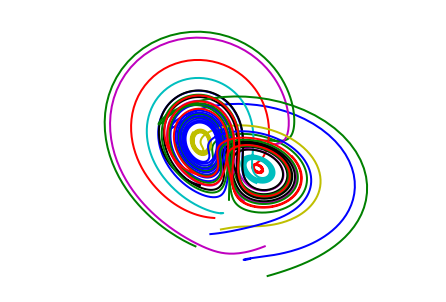

In [3]:
w = interactive(solve_lorenz, 
                angle = FloatSlider(min=0, max=360, value=0),
                N     = IntSlider(  min=0, max=50,  value=10),
                sigma = FloatSlider(min=0, max=50,  value=10),
                rho   = FloatSlider(min=0, max=50,  value=28),
                beta  = fixed(8./3))

display(w)